#### Assessing Cluster Correctness

when we have groud truth avaiable

In [19]:
from sklearn import datasets 
from sklearn import cluster 

blobs, groud_truth = datasets.make_blobs(1000,centers=3, cluster_std=1.75)

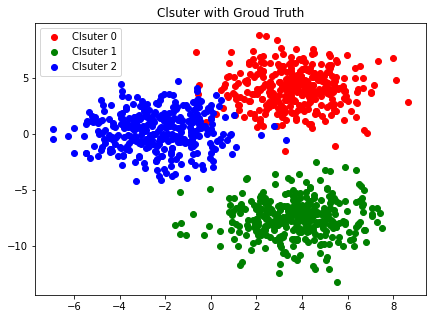

In [20]:
import matplotlib.pyplot as plt 
%matplotlib inline 

fig, ax = plt.subplots(figsize=(7,5))
colors = ['r','g','b']

for i in range(3):
    p = blobs[groud_truth == i]
    ax.scatter(p[:,0],p[:,1],c= colors[i],label='Clsuter {}'.format(i))

ax.set_title("Clsuter with Groud Truth")
ax.legend()


In [21]:
from sklearn.cluster import KMeans 
from sklearn import metrics 

kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(blobs)
kmeans.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [22]:
kmeans.cluster_centers_

array([[ 3.69195921,  4.05710993],
       [ 3.66780182, -7.52992402],
       [-2.31492391,  0.29981301]])

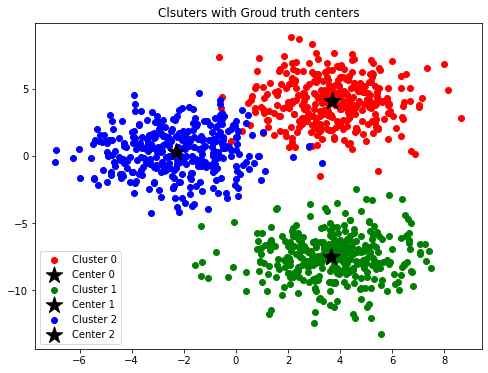

In [23]:
fig, ax = plt.subplots(figsize=(8,6))
colors = ['r','g','b']

for i in range(3):
    p = blobs[groud_truth == i]
    ax.scatter(p[:,0],p[:,1],c=colors[i],label="Cluster {}".format(i))
    ax.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], marker='*', s=300,color="black", label='Center {}'.format(i))
    ax.set_title("Clsuters with Groud truth centers")
    ax.legend()

##### Measuring Clustering performance 

In [24]:
for i in range(3):
    print((kmeans.labels_ == groud_truth)[groud_truth == i].astype(int).mean())

0.9880239520958084
1.0
0.9819819819819819


Well, we are almost correct with this. The second measure of sumilarity is the `mutual information score`

In [25]:
from sklearn import metrics 
metrics.normalized_mutual_info_score(groud_truth, kmeans.labels_)

0.952914489071619

`Mutual Information Score` when close to $0$ means labels probably are not generated through similar process, whereas when close to $1$ it means large amount of agreement between the two labels

`Normalized Mutual Information` is the mutual information divided by the root of the product of the entropy of each set `ground truth` and assigned `labels`

In [26]:
#for example 
metrics.normalized_mutual_info_score(groud_truth, groud_truth)

1.0

###### And, the un-normalized score is `mutual_info_score`

In [27]:
metrics.mutual_info_score(groud_truth, kmeans.labels_)

1.0468740431187222

In [29]:
#It is a metrics that KMEANS tries to minimize. 
#It is the sum of the squared difference between each point and its assigned cluster
kmeans.inertia_

5678.6288829495925